In [55]:
from sklearn import metrics as sk_metrics

from src.metrics import *
from src.graphs import draw_graph, random_graph
from main import em_algorithm

In [3]:
%reload_ext autoreload
%autoreload 2

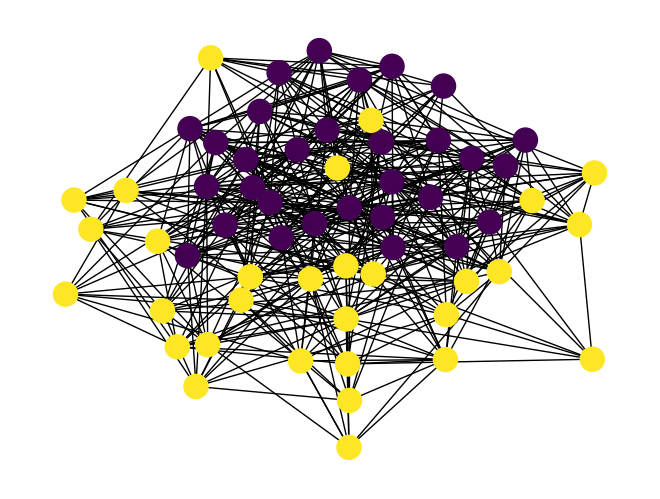

alpha:  [0.5123888 0.4876112]
pi:  [[0.37095905 0.23646422]
 [0.12904095 0.26353578]]


In [48]:
# Generate a random graph with SBM
Q = 2
n = 60
X, Z, alpha, pi = random_graph(n, Q)
draw_graph(X, Z)
print("alpha: ", alpha)
print("pi: ", pi)

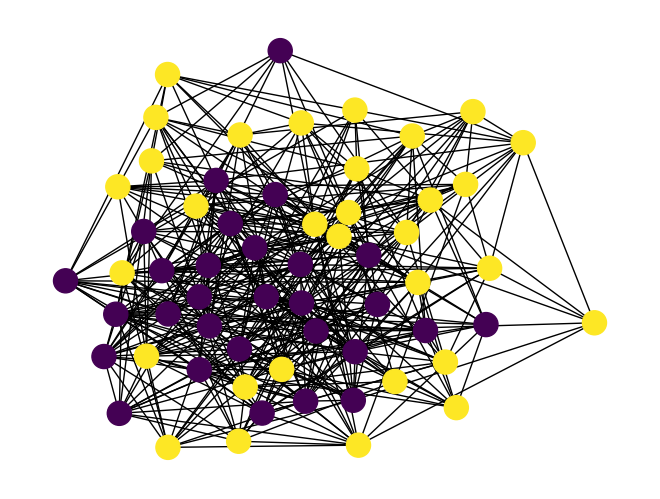

In [49]:
pred = Z.copy()
for i in range(Z.shape[0]):
    if np.random.rand() < 0.1:
        pred[i] = 1 - pred[i]
draw_graph(X, pred)

In [ ]:
true_labels_labels = np.argmax(Z, axis=1)
predictions = np.argmax(pred, axis=1)

# Test supervised metrics

In [50]:
print("Rand index: ", rand_index(true_labels_labels, predictions))
print("MI: ", normalized_mutual_information(true_labels_labels, predictions))

Rand index:  0.844632768361582
MI:  0.5882566766866641


# Test unsupervised metrics

In [51]:
original_cluster_1 = np.where(true_labels_labels == 0)[0]
original_cluster_2 = np.where(true_labels_labels == 1)[0]
predicted_cluster_1 = np.where(predictions == 0)[0]
predicted_cluster_2 = np.where(predictions == 1)[0]

print(f"Overall graph density: {intra_cluster_density(X, np.arange(X.shape[0])):.2f}")
print(f"Intra-cluster density for original cluster 1: {intra_cluster_density(X, original_cluster_1):.2f}")
print(f"Intra-cluster density for original cluster 2: {intra_cluster_density(X, original_cluster_2):.2f}")
print(f"Original inter-cluster density: {inter_cluster_density(X, original_cluster_1):.2f}")
print(f"Intra-cluster density for predicted cluster 1: {intra_cluster_density(X, predicted_cluster_1):.2f}")
print(f"Intra-cluster density for predicted cluster 2: {intra_cluster_density(X, predicted_cluster_2):.2f}")
print(f"Predicted inter-cluster density: {inter_cluster_density(X, predicted_cluster_1):.2f}")

Overall graph density: 0.25
Intra-cluster density for original cluster 1: 0.38
Intra-cluster density for original cluster 2: 0.22
Original inter-cluster density: 0.19
Intra-cluster density for predicted cluster 1: 0.36
Intra-cluster density for predicted cluster 2: 0.21
Predicted inter-cluster density: 0.21


In [59]:
print("Conductance for original clusters:", conductance(X, original_cluster_1), conductance(X, original_cluster_2))
print("Conductance for predicted clusters:", conductance(X, predicted_cluster_1), conductance(X, predicted_cluster_2))

Conductance for original clusters: 0.0003820816864295125 0.0005282331511839709
Conductance for predicted clusters: 0.0004380583236815247 0.0005489878216680607
